# Phyling API

Créez un fichier .env avec ce contenu :

```env
PHYLING_MAIL=your_email
PHYLING_PASSWORD=your_password
```

In [1]:
import json
import logging
import os
from dotenv import load_dotenv
from phylib.api import PhylingAPI

load_dotenv()

True

# Connection a l'API

In [2]:
api = PhylingAPI(
    mail=os.getenv("PHYLING_MAIL"),
    password=os.getenv("PHYLING_PASSWORD"),
    url="https://api.app.phyling.fr/"
)
logging.info(api)

[07/05/2025 16:35:30][INFO]: [API_CALL] 0.39s - POST https://api.app.phyling.fr/login - 200
[07/05/2025 16:35:30][INFO]: PhylingAPI(mail=tim.nicolas@phyling.fr, baseurl=https://api.app.phyling.fr) -> Connected


# Exemples

## Récupérer les données de l'utilisateur connecté

In [3]:
res = api.GET(
    url="/login"
)
connectedUser = json.loads(res.data.decode("utf-8"))
print(connectedUser)


[07/05/2025 16:35:32][INFO]: [API_CALL] 0.06s - GET https://api.app.phyling.fr/login - 200
{'active': True, 'client_id': 2, 'created_date': 'Thu, 11 May 2023 00:00:00 GMT', 'externalAPI': {'nolio': {'connected': True}, 'sdh': {'connected': False}}, 'firstname': 'Tim', 'groups': [{'client_id': 2, 'id': 1, 'name': 'phyling'}], 'id': 10, 'lastname': 'Nicolas', 'mail': 'tim.nicolas@phyling.fr', 'psqs_id': '', 'roles': ['Admin', 'Athlete']}


## Récupérer des utilisateurs

Une liste de filtres peuvent êtres appliqués :
```python
def get_users(
    self,
    client_id: Union[int, None] = None,
    group_ids: list = [],
    role: Union[str, None] = None,
    active: bool = True,
    search: str = "",
    pageId: int = 1,
    pageSize: int = 0,
    soft: bool = False,
) -> Union[dict, None]:
    """Get the users from the API

    Args:
        client_id (int): clients id. None to select all
        group_ids (list): list of group ids. Empty to select all
        role (str, optional): The users roles (Admin, Coach or Athlete). None to select all
        active (bool, optional): The users active status. Defaults to True.
        search (str): The search string
        pageSize (int): Size of one page. Default: -1 (select all)
        pageId (int): Page id. Default: 1
        soft (bool): If true, only return minimal information on users

    Returns:
        dict: {
            "items": [User, ...],
            "total": int,
        }
    """
    pass
```

In [4]:
users = api.get_users(
    client_id=connectedUser["client_id"],
)
print(users)

[07/05/2025 16:35:34][INFO]: [API_CALL] 0.17s - POST https://api.app.phyling.fr/users/all - 200
{'items': [User(id=6, mail=jean-philippe.boucher@phyling.fr), User(id=5, mail=eric.busquet@phyling.fr), User(id=78, mail=romain.caux@phyling.fr), User(id=9, mail=thomas.chevallier@phyling.fr), User(id=3, mail=benoit.grillet@phyling.fr), User(id=2, mail=a.karamanoukian@phyling.fr), User(id=12, mail=alban.labbe@phyling.fr), User(id=8, mail=romain.labbe@phyling.fr), User(id=483, mail=jules.levasseur680@gmail.com), User(id=10, mail=tim.nicolas@phyling.fr), User(id=1, mail=admin@phyling.fr), User(id=11, mail=remy.roinson@phyling.fr), User(id=257, mail=romain.caux@gmail.com), User(id=7, mail=marie.segol@phyling.fr), User(id=595, mail=guill.walter@gmail.com)], 'total': 15}


In [5]:
print(users["items"][0].to_dict())

{'active': True, 'client_id': 2, 'created_date': 'Thu, 11 May 2023 00:00:00 GMT', 'firstname': 'Jean-Philippe', 'groups': [{'client_id': 2, 'id': 1, 'name': 'phyling'}], 'id': 6, 'lastname': 'Boucher', 'mail': 'jean-philippe.boucher@phyling.fr', 'psqs_id': '', 'roles': ['Admin', 'Athlete']}


## Récupérer des records

Une liste de filtres peuvent êtres appliqués :
```python
def get_records(
    self,
    type: str = "all",
    pageSize: int = 10,
    pageId: int = 1,
    onlyFavorite: bool = False,
    userIds: list = [],
    deviceIds: list = [],
    clientIds: list = [],
    groupIds: list = [],
    exerciseIds: list = [],
    sportIds: list = [],
    record_type: str = "",
    scenarioIds: list = [],
    minDate: str = "",
    maxDate: str = "",
) -> Union[dict, None]:
    """Get the records from the API

    Args:
        type (str): should be `all`, `new` or `associated`
        pageSize (int): Size of one page. Default: -1 (select all)
        pageId (int): Page id. Default: 1
        onlyFavorite (bool, optional): Select only favorites. Default to False.
        userIds (list): Users ids. Empty to select all
        deviceIds (list): devices ids. Empty to select all
        clientIds (list): clients ids. Empty to select all
        groupIds (list): groups ids. Empty to select all
        exerciseIds (list): exercises ids. Empty to select all
        sportIds (list): sport ids. Empty to select all
        record_type (str): record type. Can be seance, record, scenario, calib, miniphyling, fusion or video
        scenarioIds (list[int]): scenario ids. Empty to select all
        minDate (str): min record date. Empty to select all
        maxDate (str): max record date. Empty to select all

    Returns:
        dict: {
            "records": [Record, ...],
            "total": int,
        }
    """
    pass
```

In [6]:
recs = api.get_records(
    userIds=[connectedUser["id"]],
)

[07/05/2025 16:35:37][INFO]: [API_CALL] 0.16s - POST https://api.app.phyling.fr/records/all - 200


In [7]:
recs

{'records': [Record(id=2981, size=91 ko),
  Record(id=2299, size=1.1 Mo),
  Record(id=456, size=3.4 Mo)],
 'total': 3}

In [8]:
print(recs["records"][0])

Record(
    id=2981,
    date=28/04/2025 14:06:55,
    record_type=record,
    decode_state=decoded,
    client_id=2,
    group_id=1,  # phyling
    user_ids=[10],  # Tim Nicolas
    sport_id=4,  # Défaut
    device_id=10200300,  # Maxi 300
    exercise_name=None,
    size=91 ko,
)


---
Téléchargement de record
```python
def download_record(
    self,
    rec_id: int,
    file_type: str,
    download_path: str,
    overwrite: bool = True,
    timeout: int = 180,
    **kwargs,
) -> bool:
    """
    Download the record.

    Args:
        rec_id (int): The ID of the record to download.
        file_type (str): The type of file to download. Can be one of the following:
            - "raw": raw data (.txt)
            - "decoded": decoded data (.csv)
            - "pdf": pdf report (.pdf)
            - "stats": stats report (.csv)
            - "specific_stats": specific stats report (.csv)
            - "compressed": compressed data (.csv)
            - "video": video file (.mp4) -> only for video records
            - "zip": zip file (.zip)
        download_path (str): The path to save the downloaded file.
        overwrite (bool): If True, overwrite the file if it already exists. Default is False.
        timeout (int): The timeout for the request. Default is 180 seconds.
        **kwargs: Additional arguments for the request.
    """
    pass
```

In [9]:
api.download_record(
    rec_id=recs["records"][0]["id"],
    file_type="raw",
    download_path="/tmp/example_data.txt",
    overwrite=True,
)

[07/05/2025 16:35:43][INFO]: [API_CALL] 1.26s - POST https://api.app.phyling.fr/records/2981/file/raw - 200
[07/05/2025 16:35:43][INFO]: File downloaded to: /tmp/example_data.txt


True

---
Décoder un record RAW

In [10]:
import os
from decoder import decoder

In [11]:
path = "/tmp/"
raw_file = "example_data.txt"
data_json = decoder.decode(os.path.join(path, raw_file), verbose=True, use_s3=False)

[07/05/2025 16:35:46][INFO]: <== decode start [/tmp/example_data.txt] ==>
[07/05/2025 16:35:46][INFO]: load /tmp/example_data.txt...
[07/05/2025 16:35:46][INFO]: read 0.091Mb in 0.00s
[07/05/2025 16:35:46][INFO]: start decoding file
[07/05/2025 16:35:46][INFO]: maxiphyling #300 v6.6.5
[07/05/2025 16:35:46][INFO]: Time starting precision: 10.000ms (2025-04-28 14:06:55.179212)
[07/05/2025 16:35:46][INFO]: mini-imu: Applied time offset:  0.4ms from T 0s to 19s
[07/05/2025 16:35:46][INFO]: [100%]: 4k data decoded
[07/05/2025 16:35:46][INFO]: Record started on 2025-04-28 14:06:55.179212. Time precision: 10.000ms
[07/05/2025 16:35:46][INFO]: total: 3894 data
[07/05/2025 16:35:46][INFO]: 	imu: 1929 datas
[07/05/2025 16:35:46][INFO]: 	mini-imu: 1965 datas
[07/05/2025 16:35:46][INFO]: <== decode end [SUCCESS] ==>
[07/05/2025 16:35:46][INFO]: File decoded in 0.056s


In [12]:
# list modules
print(data_json["modules"].keys())

dict_keys(['imu', 'mini-imu'])


---
Process and plot

In [13]:
# Library imports
%matplotlib widget
import matplotlib.pyplot as plt
from decoder import utils

Text(0, 0.5, 'Acc. (m/s$^2$)')

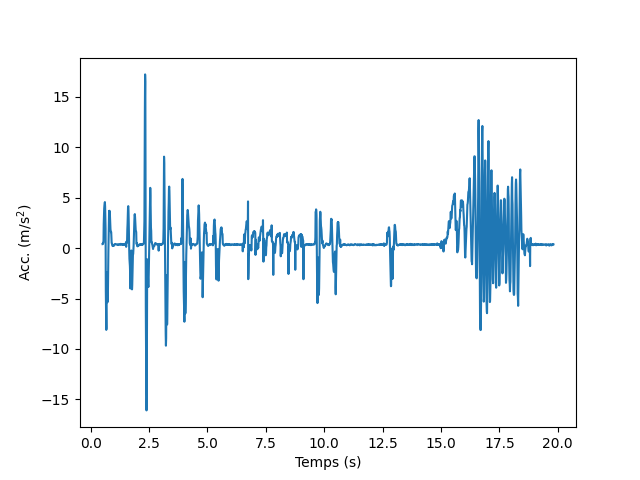

In [14]:
# Directly from data object

modName = "imu"
mod = data_json["modules"][modName]["data"]

plt.figure()
plt.plot(mod["T"], mod["acc_x"])
plt.xlabel("Temps (s)")
plt.ylabel("Acc. (m/s$^2$)")

In [15]:
# Convert data object to Dataframes

df = utils.data2df(data_json, "all")
print(list(df))
df["imu"].head()

['imu', 'mini-imu']


,T,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0.508685,0.392557,-0.143618,9.550624,-1.89,-2.52,-5.60
1,0.518701,0.397344,-0.114895,9.593710,-2.24,-2.17,-5.95
2,0.528717,0.526601,-0.052660,9.521900,-2.31,-1.96,-6.16
3,0.538727,0.478728,-0.138831,9.550624,-2.17,-1.96,-7.14
4,0.548733,0.641496,-0.258513,9.593710,-2.24,-2.10,-7.91


Text(0, 0.5, 'Acc. (m/s$^2$)')

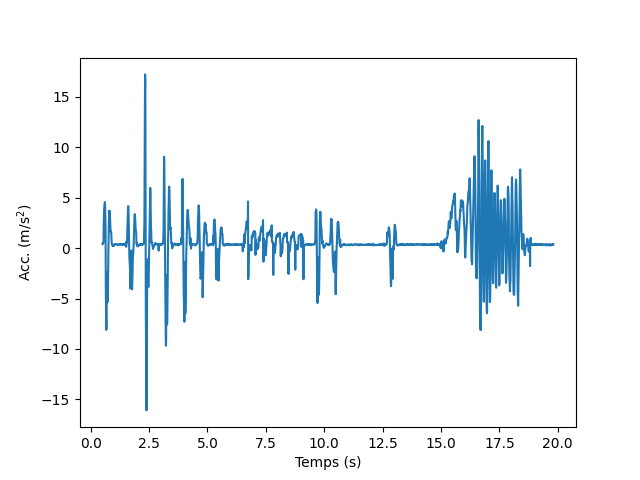

In [16]:
plt.figure()
plt.plot(df["imu"]["T"], df["imu"]["acc_x"])
plt.xlabel("Temps (s)")
plt.ylabel("Acc. (m/s$^2$)")